In [3]:
"""Module to explore data.
Contains functions to help study, visualize and understand datasets.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [24]:
df1 = pd.read_csv('./data/train_lyrics_1000.csv')
df2 = pd.read_csv('./data/valid_lyrics_200.csv')

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
blue = '#5A6FFA'
brown2 = '#ee3b3b'

In [52]:
happy_train, sad_train = sum(df1.loc[:, 'mood'] == 'happy'), sum(df1.loc[:, 'mood'] == 'sad')
print(happy, sad)

105 95


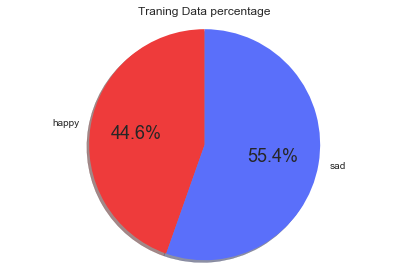

In [61]:
from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (happy_train, sad_train),
    labels=('happy','sad'),
    shadow=True,
    colors=(brown2, blue),
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
plt.title('Traning Data percentage')
plt.savefig('./EDAimages/pie_train_happy_sad.eps', dpi=300)

In [54]:
happy_test, sad_test = sum(df2.loc[:, 'mood'] == 'happy'), sum(df2.loc[:, 'mood'] == 'sad')
print(happy, sad)

105 95


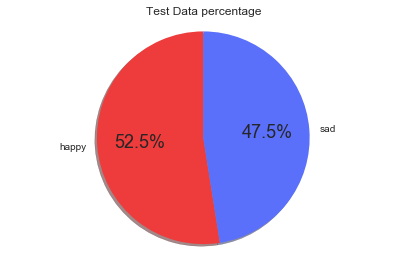

In [59]:

from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (happy_test, sad_test),
    labels=('happy','sad'),
    shadow=True,
    colors=(brown2, blue),
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal') 
plt.title('Test Data percentage')
plt.tight_layout()
plt.savefig('./EDAimages/pie_test_happy_sad.eps', dpi=300)

mood         happy    sad
genre                    
Blues         17.0    7.0
Christian     27.0   17.0
Country       43.0   36.0
Dance          NaN    1.0
Electronic    19.0   21.0
Hip Hop/Rap   41.0   64.0
Jazz           2.0   12.0
Pop           47.0   35.0
R&B           30.0   23.0
Rock         205.0  328.0
Ska           10.0    7.0
Soul           5.0    3.0


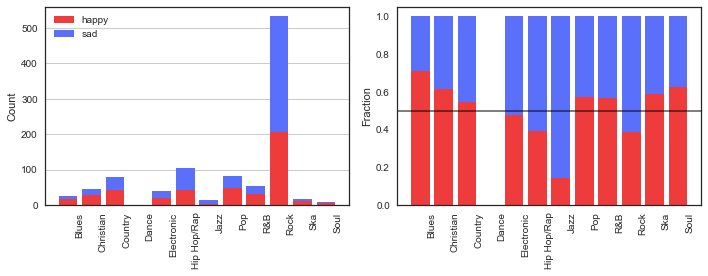

In [82]:
gclass = df1.groupby(['genre', 'mood']).size().unstack()

print(gclass)



fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,13)

# absolute values
plt.subplot(121)
plt.bar(pos, gclass.values[:,0], label='happy', color=brown2)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
gclass = (gclass.T / gclass.T.sum()).T 

plt.subplot(122)
plt.bar(pos, gclass.values[:,0], label='happy', color=brown2)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel('Fraction')
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel('')
plt.tight_layout()
plt.savefig('./EDAimages/bar_genre_mood.eps', dpi=300)

### Word Clouds

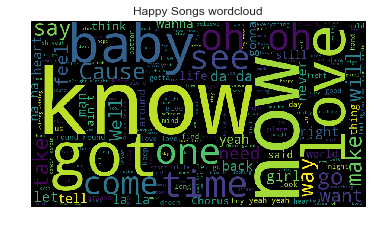

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS


happy_words = ' '.join(df1.loc[df1['mood']=='happy', 'lyrics'])

happy_wordcloud = WordCloud( 
                      background_color='black',
                      stopwords=STOPWORDS,
                      width=900,
                      height=500
            ).generate(happy_words)

plt.imshow(happy_wordcloud)
plt.axis('off')
plt.title('Happy Songs wordcloud')
plt.savefig('./EDAimages/wordcloud_happy_all_w.png', dpi=400)
plt.show()

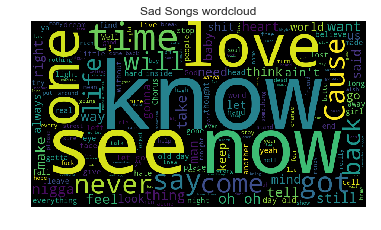

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS


happy_words = ' '.join(df1.loc[df1['mood']=='sad', 'lyrics'])

happy_wordcloud = WordCloud( 
                      background_color='black',
                      stopwords=STOPWORDS,
                      width=900,
                      height=500
            ).generate(happy_words)

plt.imshow(happy_wordcloud)
plt.axis('off')
plt.title('Sad Songs wordcloud')
plt.savefig('./EDAimages/wordcloud_sad_all_w.png', dpi=400)
plt.show()